In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({"figure.dpi":160})
import sys
sys.path.append("/home/msdos/DESI-QA/desiarc-main/arc")
import find_center as fc


In [3]:
def get_timecol(db):
    new = db.label.str.split("-", n=1, expand=True)
    new.columns = ['label', 'session']
    db['label'] = new['label']
    db.insert(1, "session", new['session'])
    db['session'] = pd.to_datetime(db['session'], format= '%Y%m%d-%H%M%S' )#.dt.time
    return 

def query_time(db, datemin=None, datemax=None):
    """
    First run get_timecol(database)
    datemin, datemax (str): e.g "2023-02-03 13:36:00"
    """
    dmin = [np.datetime64(datemin) if not None else None][0]
    dmax = [np.datetime64(datemax) if not None else None][0]
    cond1 = db["session"] >= dmin
    cond2 = db["session"] <= dmax
    if (datemin is not None) & (datemax is not None):
        return cond1 & cond2
    elif datemin is None:
        return cond2
    elif datemax is None: 
        return cond1 
    else:
        print("check datemin datemax fields")

In [12]:
pix2mm = 0.035354

def poscoord (xpix, ypix, xc=xc, yc=yc): 
    return xpix*pix2mm -xc, ypix*pix2mm - yc


In [ ]:
# Querying session time examples: 
msk_time = query_time(db, datemin="2022-02-03 00:00:00", datemax="2023-02-03 00:00:00")
msk_time = query_time(db, datemin="2023-02") # only from February 2023

msk1 = db.index>65


# Metrology

In [5]:
db = pd.read_csv('../output/database.csv', sep=',')
get_timecol(db)
db['xmm'] = db['xpix']* pix2mm
db['ymm'] = db['ypix']* pix2mm
db

,label,session,mount,move,posid,direction,speed,motor,angle,xpix,ypix,peaks,fwhm,xmm,ymm
0,curreposition,2023-02-03 11:09:58,0,20230203-111001,4852,cw,cruise,theta,0.000000,1972.161217,877.627679,75521.3256,3.3406,69.723788,31.027649
1,arcphi15,2023-02-03 12:09:29,0,20230203-120931,4852,cw,cruise,phi,0.000000,1972.512194,877.419182,73646.1300,3.3528,69.736196,31.020278
2,arcphi15,2023-02-03 12:09:29,0,20230203-120940,4852,cw,cruise,phi,15.000000,1978.753213,902.512606,74605.0360,3.3693,69.956841,31.907431
3,arcphi15,2023-02-03 12:09:29,0,20230203-120949,4852,cw,cruise,phi,15.000000,1976.627232,931.062076,78369.6116,3.5316,69.881679,32.916769
4,arcphi15,2023-02-03 12:09:29,0,20230203-120958,4852,cw,cruise,phi,15.000000,1965.341254,957.173044,76179.1692,3.4034,69.482675,33.839896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,xy60,2023-02-17 19:24:56,0,20230217-193605,4852,ccw,cruise,phi,26.220457,2102.450087,832.839475,72528.1153,3.2608,74.330020,29.444207
521,xy60,2023-02-17 19:24:56,0,20230217-193617,4852,ccw,cruise,phi,9.432913,2101.029312,873.200247,72848.5657,3.2484,74.279790,30.871122
522,xy60,2023-02-17 19:24:56,0,20230217-193628,4852,ccw,cruise,phi,-3.931835,2099.840319,911.193117,73464.2242,3.2511,74.237755,32.214321
523,xy60,2023-02-17 19:24:56,0,20230217-193640,4852,cw,cruise,phi,9.500795,2098.633088,949.330563,73773.8229,3.2545,74.195074,33.562633


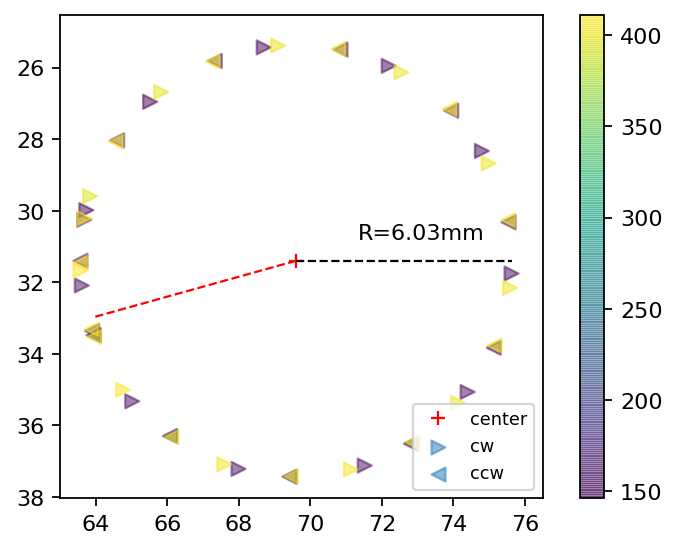

In [13]:
# db = pd.read_csv('../output/database.csv', sep=' ')
# get_timecol(db)

msk1 = db["label"].str.contains('arcth')
msk = msk1 #& query_time(db, datemax="2023-03")
msk = msk_arcth1 #& (db['direction']=='cw')

xc0, yc0 = (1973*pix2mm, 885 *pix2mm)
r = (171+20)*pix2mm

plt.scatter("xmm","ymm",c = list(db[msk & (db.direction=='cw')].index), 
            marker='>',s=40, alpha=0.5, data=db[msk & (db.direction=='cw')], label='cw')

plt.scatter("xmm","ymm",c = list(db[msk & (db.direction=='ccw')].index), 
            marker='<',s=40, alpha=0.5, data=db[msk & (db.direction=='ccw')], label='ccw')

plt.colorbar()
plt.xlim(xc0-r, xc0+r)
plt.ylim(yc0+r, yc0-r)
# plt.plot(xc0,yc0, 'rx', label='center-Feb2023')
plt.plot(xc,yc, 'r+', label='center')
plt.plot( np.linspace(xc, xc+Rarc, 10), np.ones(10)*yc, 'k--', lw=1 )

plt.annotate(f"R={Rarc:.2f}mm", xy=(xc+Rarc/3.5, yc- Rarc/10))

plt.legend(loc='best', fontsize=8)
plt.gca().set_aspect('equal')

plt.plot( xc+ (xc2-xc)*np.linspace(0,1)*2, yc+ (yc2-yc)*np.linspace(0,1)*2, 'r--', lw=1 )

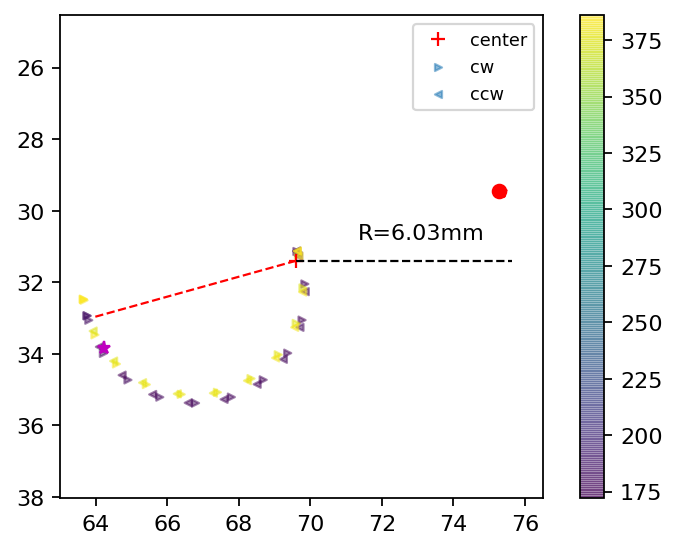

In [14]:
# db = pd.read_csv('../output/database.csv', sep=' ')
# get_timecol(db)


msk = msk_arcph #& (db['direction']=='cw')

xc0, yc0 = (1973*pix2mm, 885 *pix2mm)
r = (171+20)*pix2mm

plt.scatter("xmm","ymm",c = list(db[msk & (db.direction=='cw')].index), 
            marker='>',s=10, alpha=0.5, data=db[msk & (db.direction=='cw')], label='cw')

plt.scatter("xmm","ymm",c = list(db[msk & (db.direction=='ccw')].index), 
            marker='<',s=10, alpha=0.5, data=db[msk & (db.direction=='ccw')], label='ccw')

plt.colorbar()
plt.xlim(xc0-r, xc0+r)
plt.ylim(yc0+r, yc0-r)
# plt.plot(xc0,yc0, 'rx', label='center-Feb2023')
plt.plot(xc,yc, 'r+', label='center')
plt.plot( np.linspace(xc, xc+Rarc, 10), np.ones(10)*yc, 'k--', lw=1 )

plt.annotate(f"R={Rarc:.2f}mm", xy=(xc+Rarc/3.5, yc- Rarc/10))

plt.legend(loc='best', fontsize=8)
plt.gca().set_aspect('equal')
plt.plot(5.675741989186804 + xc, -1.9454820354196798+yc, 'ro')

plt.plot(2130.3044693383354*pix2mm,  pix2mm*833.511437039412, 'r*')
plt.plot(64.24628981320471, 33.84828000931173, 'm*')

plt.plot( xc+ (xc2-xc)*np.linspace(0,1)*2, yc+ (yc2-yc)*np.linspace(0,1)*2, 'r--', lw=1 )

In [15]:
def angle_between(c, p1, p2):
    # p1, p2 are points; c is center
    a = np.array(p1)
    b = np.array(c)
    c = np.array(p2)
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

(-0.5151435888540656, 0.2066980177557353)

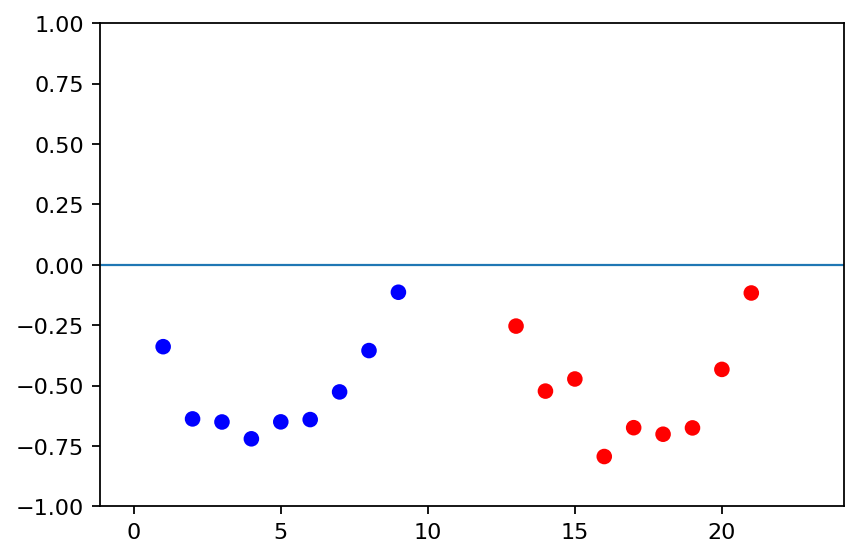

In [23]:
msk_arcth1 =( db['label'].str.contains('arcth30') )& (query_time(db, "2023-02-13", datemax="2023-02-14")) \
            &(db.motor =='theta')

msk_arcph =( db['label'].str.contains('arcph') ) & (query_time(db, "2023-02-13", datemax="2023-02-14")) 

colors = ['b' if  i=='cw' else 'r' for i in db[msk_arcph]['direction'].iloc[1:]]
xytuples = [(i,j) for i, j in zip(db[msk_arcph]['xmm'].values, db[msk_arcph]['ymm'].values)]

angs = np.array([angle_between((xc2, yc2), xytuples[i], xytuples[i+1]) for i in range(len(xytuples) -1 ) ] )
# Stats for this residuals 
res = angs -15 - 2* 1.995

# plt.plot( res, 'o' )#, c=colors[1:])
plt.scatter(np.arange(len(res)), res, c=colors)
plt.axhline(0, lw=1, zorder=0)
plt.ylim(-1, 1)

# yellow flag ~0.5 deg  phi 
np.mean(res[abs(res)< 1]), np.std(res[abs(res)< 1], ddof=1)

In [20]:
db[(msk_arcph) & query_time(db[msk_arcph], '2023-02-03' )]

,label,session,mount,move,posid,direction,speed,motor,angle,xpix,ypix,peaks,fwhm,xmm,ymm
159,arcphi15,2023-02-13 20:47:24,0,20230213-204727,4852,cw,cruise,phi,0.0,1969.331541,880.768070,72333.8544,3.2703,69.623747,31.138674
160,arcphi15,2023-02-13 20:47:24,0,20230213-204735,4852,cw,cruise,phi,15.0,1975.634718,906.451763,73008.3557,3.2553,69.846590,32.046696
161,arcphi15,2023-02-13 20:47:24,0,20230213-204744,4852,cw,cruise,phi,15.0,1973.418675,934.994795,71362.6358,3.2823,69.768244,33.055806
162,arcphi15,2023-02-13 20:47:24,0,20230213-204753,4852,cw,cruise,phi,15.0,1962.073124,961.110090,71550.0592,3.2983,69.367133,33.979086
163,arcphi15,2023-02-13 20:47:24,0,20230213-204802,4852,cw,cruise,phi,15.0,1942.711753,982.235699,72914.3460,3.3128,68.682631,34.725961
164,arcphi15,2023-02-13 20:47:24,0,20230213-204811,4852,cw,cruise,phi,15.0,1917.530466,995.878816,72828.9515,3.3467,67.792372,35.208300
165,arcphi15,2023-02-13 20:47:24,0,20230213-204820,4852,cw,cruise,phi,15.0,1889.191298,1000.624579,74491.8682,3.3940,66.790469,35.376081
166,arcphi15,2023-02-13 20:47:24,0,20230213-204829,4852,cw,cruise,phi,15.0,1860.942180,995.927830,76969.7442,3.4426,65.791750,35.210032
167,arcphi15,2023-02-13 20:47:24,0,20230213-204838,4852,cw,cruise,phi,15.0,1835.775641,982.319054,79398.0922,3.7441,64.902012,34.728908
168,arcphi15,2023-02-13 20:47:24,0,20230213-204847,4852,cw,cruise,phi,15.0,1816.330060,961.344888,75045.7676,3.5335,64.214533,33.987387


In [112]:
len(colors[1:]), len(res)

(24, 24)

In [22]:
xx, yy = [i*pix2mm for i in [1817.228314001378, 957.4101943008354]]
xx, yy = [i*pix2mm for i in [1292.52, 940.68]]
xx-xc, yy-yc

(-23.906259801997315, 1.8590721059357591)

Text(0.5, 0, '$ \\Delta R_i/ R_{fit}$')

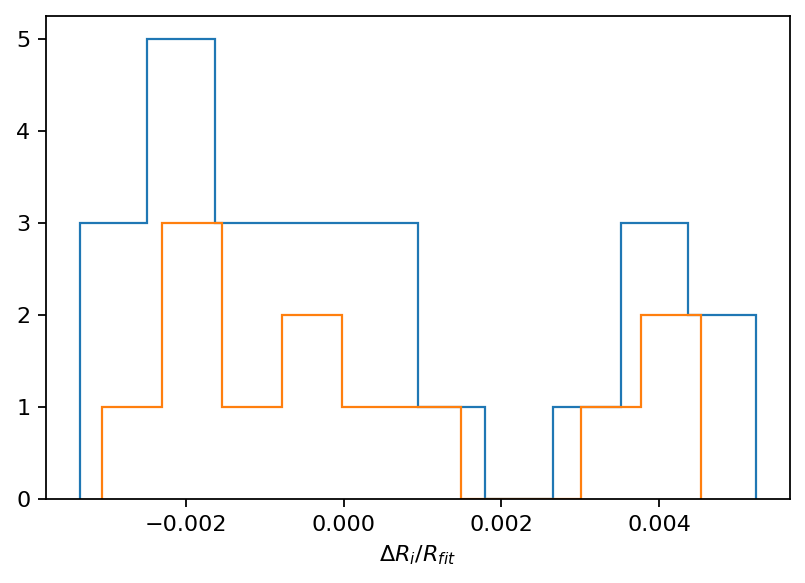

In [21]:
# msk_arcth1 =( db['label'].str.contains('arcth30') )| (db['direction']=='cw') & (query_time(db, "2023-02-07"))
msk = msk_arcph
DR = np.hypot(db['xmm'][msk_arcth1] - xc, db['ymm'][msk_arcth1] - yc)
DR2 = np.hypot(db['xmm'][msk_arcth1 & (db.direction=='cw')] - xc, db['ymm'][msk_arcth1& (db.direction=='cw')] - yc)

plt.hist(DR -Rarc , histtype='step')
plt.hist(DR2- Rarc, histtype='step')
# plt.hist(DR/Rarc -1, histtype='step')


plt.xlabel("$ \Delta R_i/ R_{fit}$")

In [53]:
np.hypot(5.675741989186804, -1.9454820354196798)
np.sqrt(5.9**2 - 5**2)

3.132091952673165

In [44]:
np.hypot(xc2-xc, yc2-yc)

2.9625157420276573

In [11]:
msk_arcph = (db['label'].str.contains('arcph')) & (query_time(db, "2023-02-13"))
msk_arcth1 =( db['label'].str.contains('arcth30') )& (query_time(db, "2023-02-13")) \
            &(db.motor =='theta')
5
xc2, yc2, R2 = [i*pix2mm for i in fc.get_circle(db[msk_arcph ])]
print(xc2, yc2, R2)
# xc, yc, Rarc = fc.get_circle(db[msk_arcth])
xc, yc, Rarc = [i*pix2mm for i in fc.get_circle(db[msk_arcth1],)]
print(fc.get_circle(db[msk_arcth1]))
# print(xc2, yc2, R2, R2*pix2mm,)
print(xc, yc, Rarc, Rarc/pix2mm)


db[msk_arcth1], 
Rarc, R2, xc2, yc2
# np.sign(xc2-xc), np.sign(yc2-yc), 180 + np.rad2deg(np.arctan((yc2-yc)/(xc2-xc)))

66.74881006393363 32.19295019145372 3.075076824088685
(1968.7167472421033, 888.0955086854171, 170.6247281817742)
69.60201188199731 31.397728614064235 6.032266640138444 170.6247281817742


(6.032266640138444, 3.075076824088685, 66.74881006393363, 32.19295019145372)

In [25]:
xc, yc

(69.60399862271909, 31.40032983828514)

No handles with labels found to put in legend.


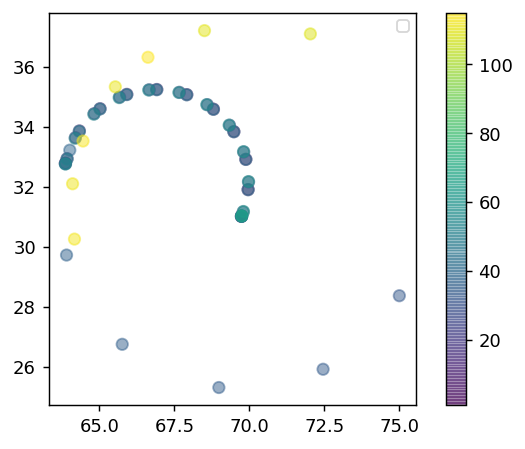

In [149]:
# xc, yc = (1973, 885)
r = 171+20

msk = msk_arcph | msk_arcth

plt.scatter("xmm","ymm",c = list(db[msk].index), marker='o',
            s=40, alpha=0.5, data=db[msk], label='')

plt.colorbar()
# plt.xlim(xc-r,xc+r)
# plt.ylim(yc+r, yc-r)
# plt.plot(xc,yc, 'rx', label='cw')
# plt.plot(xc_ccw, yc_ccw, 'r+', label='ccw')

# plt.plot(xc2, yc2, 'gx', label='tip theta')


# plt.plot( 1972.1612173606197, 877.6276787398024, 'k+', label='home-Feb2023')
plt.legend(loc='best', fontsize=8)
plt.gca().set_aspect('equal')

In [185]:
posid = '9999'
pos_speed = {'9999': {'cruise': 33, 'spinramp':12}}
_dir, ispeed, _motor, _ang = 'cw', 'cruise', 'theta', 30
prevmv = None

# argscorrection(_dir, ispeed, _motor, _ang, 
#                                       pos_speed[posid], prevmv) 
def argscorrection(direc, speed, motor, ang, def_speed, prevmv):
    """
    backlash and ramp added here. Agnostic to motor 
    todo: check backlash number for a given positioner
    """
    val_backlash= 2.5
    if prevmv is None:
        add_backlash = 0.0
    elif prevmv==direc:
        add_backlash = 0.0
    elif direc != prevmv:
        print("Adding 2.5 deg of backlash")
        add_backlash = val_backlash
        
    if speed=='creep':
        add_ramp = 0.0
        
    elif speed=='cruise':
        cruise = def_speed['cruise']
        ramp = def_speed['spinramp']
        if cruise==33 and ramp== 12:
            add_ramp = 1.995
        else:
            print("NotImplemented spin and cruise")
            return None
    ang2 = ang + add_backlash - 2*add_ramp
    
    if ang2 < add_backlash+ 5e-2 :
        print("move too small for cruise < 4.0")
        ang2=0
    return direc, speed, motor, ang2

In [189]:
for direc, speed, motor, ang, prevmv in zip(['cw', 'cw', 'ccw', 'ccw' ], 
                                    ['cruise']*4, 
                                   ['any']*4, 
                                   [4]*4, 
                                   ['ccw', 'ccw', 'cw', None ]):
    
    print(argscorrection(direc, speed, motor, ang, pos_speed[posid], prevmv),'\n')

Adding 2.5 deg of backlash
move too small for cruise < 4.0
('cw', 'cruise', 'any', 0) 

Adding 2.5 deg of backlash
move too small for cruise < 4.0
('cw', 'cruise', 'any', 0) 

Adding 2.5 deg of backlash
move too small for cruise < 4.0
('ccw', 'cruise', 'any', 0) 

move too small for cruise < 4.0
('ccw', 'cruise', 'any', 0) 



# config db

In [264]:
# TODO: remove hardcoded stuff here
pix2mm = 0.035337
# todo, pass this as dictionary per positioner
dev_bb = {'can22': ['4852']}
posid = '4852'
hardstop_ang = {"4852": 166.270588} # in deg
R1 = {"4852": 3.0747} # R theta
R2 = {"4852": 2.9625} # R phi
center = {"4852":[ 69.60399862271909, 31.40032983828514]}
center_pix = [i/pix2mm for i in center['4852']]
pos_speed = {"4852":{"cruise": 33, "spinramp": 12, }}

In [265]:
center_pix

[1969.7200844078186, 888.5963674982352]

In [203]:
for ipid in dev_bb['can22']:
    # ipid, R1, R2, xcmm, ycmm, defcruise, deframp, hardstopdeg, pix2mm 
    print(ipid,  R1[ipid], R2[ipid], center[ipid][0], center[ipid][1], 
          pos_speed[ipid]['cruise'], pos_speed[ipid]['spinramp'], 
          hardstop_ang[ipid], pix2mm)

4852 3.0747 2.9625 69.60399862271909 31.40032983828514 33 12 166.270588 0.035337


In [220]:
# Ramp angle: 
defcruise = 11
deframp = 27
gear_ratio = (46/14 + 1)**4
ramp_ang = lambda defcruise, deframp: defcruise*(defcruise+1)* deframp / 20/ gear_ratio

np.isclose( ramp_ang(33, 12), 1.99549)

True

(-5.6205223795421375, 1.8307085742324176)

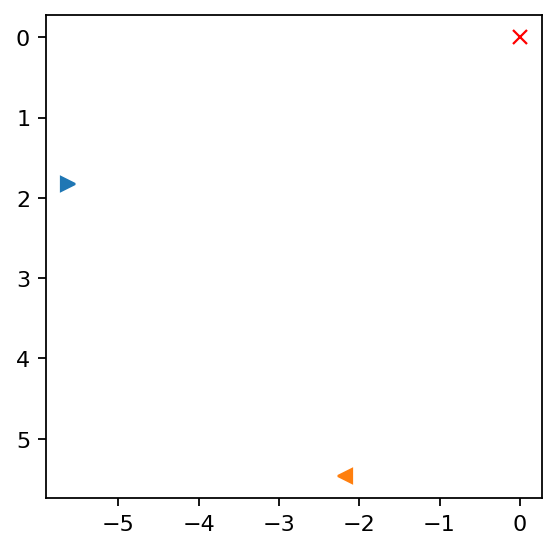

In [243]:
hs = hardstop_ang["4852"]

xpos, ypos = poscoord(1810.6652020029135, 940.4034981044671) 

plt.plot(xpos, ypos, '>')
plt.plot(*poscoord(1908.1386613918696,1043.359122190031), '<')
plt.plot(0,0 , 'rx')

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
angle_between([0,0], [5,0],[xpos, ypos] )
xpos, ypos

In [236]:
def poscoord (xpix, ypix, xc=xc, yc=yc): 
    return xpix*pix2mm -xc, ypix*pix2mm - yc


In [247]:
xc/pix2mm, yc/pix2mm

(1969.7200844078186, 888.5963674982352)

In [263]:
poscoord(1810.642936145952 , 949.7828450586057)

(-5.62130918812958, 2.1621465575508125)

In [30]:
np.degrees(np.arctan(1.36/5.556))

13.754431356863726